# STEP 1: Import Required Libraries

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split , cross_val_score , GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score ,root_mean_squared_error, classification_report

import warnings
warnings.filterwarnings('ignore')



# STEP 2: Load the Dataset and EDA

In [89]:

df = pd.read_csv('C:/161815Project/DS-Intern-Assignment-Neetesh Kumar/DS-Intern-Assignment-Neetesh-Kumar/data/data.csv')

In [90]:
df.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     16857 non-null  object 
 1   equipment_energy_consumption  16013 non-null  object 
 2   lighting_energy               16048 non-null  object 
 3   zone1_temperature             15990 non-null  object 
 4   zone1_humidity                16056 non-null  object 
 5   zone2_temperature             16004 non-null  object 
 6   zone2_humidity                15990 non-null  float64
 7   zone3_temperature             16055 non-null  float64
 8   zone3_humidity                15979 non-null  float64
 9   zone4_temperature             16041 non-null  float64
 10  zone4_humidity                16076 non-null  float64
 11  zone5_temperature             16019 non-null  float64
 12  zone5_humidity                16056 non-null  float64
 13  z

In [92]:
df.shape

(16857, 29)

In [93]:
df.describe()

,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,zone5_humidity,zone6_temperature,zone6_humidity,zone7_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
count,15990.000000,16055.000000,15979.000000,16041.000000,16076.000000,16019.000000,16056.000000,16009.000000,16010.000000,16063.000000,...,16084.000000,15969.000000,16051.000000,16015.000000,16058.000000,16029.000000,16042.000000,16031.000000,16031.000000,16033.000000
mean,39.494553,21.665733,38.201314,20.239922,37.945608,19.052613,50.289131,6.469934,59.162913,19.672472,...,18.851085,40.318199,6.218582,755.757602,78.977595,4.195988,38.457150,2.783507,24.854981,25.093780
std,10.129513,2.594309,10.144388,2.783050,10.769813,2.346158,18.722516,8.867993,52.657787,2.879815,...,2.528783,11.168678,7.554684,13.643585,28.565660,4.409729,21.318655,6.094732,26.214960,25.523631
min,-77.265503,6.543921,-71.406273,4.613485,-81.446225,5.921094,-141.640143,-42.987365,-353.393026,3.578021,...,4.476511,-81.582494,-37.524768,678.159940,-221.668765,-20.929527,-82.329792,-32.098095,-120.170177,-120.409590
25%,37.757500,20.533333,36.592500,19.266667,35.200000,18.061111,45.290000,2.930000,37.066667,18.500000,...,17.890000,38.230000,3.000000,750.800000,71.000000,2.000000,29.000000,0.450000,12.179924,12.193789
50%,40.293333,21.767500,38.400000,20.290000,38.090000,19.050000,48.854429,6.263333,62.766667,19.600000,...,18.890000,40.363333,6.000000,756.200000,84.166667,4.000000,40.000000,2.750000,24.866978,24.834261
75%,43.000000,22.760000,41.433333,21.356667,41.560833,20.100000,53.918333,9.690000,86.590000,21.000000,...,20.200000,43.790000,9.250000,762.100000,91.988095,6.000000,40.000000,5.308333,37.950236,37.971764
max,77.265503,36.823982,71.406273,35.921144,81.446225,32.157594,141.640143,55.932271,353.393026,35.712952,...,33.238012,81.582494,49.853906,833.392675,221.668765,29.318719,159.606156,37.673716,170.156325,170.329617


In [94]:
# Checking for missing values

df.isnull().sum().sort_values(ascending=False)

zone9_humidity                  888
zone3_humidity                  878
zone1_temperature               867
zone2_humidity                  867
zone2_temperature               853
zone8_temperature               848
zone6_temperature               848
zone6_humidity                  847
equipment_energy_consumption    844
atmospheric_pressure            842
zone5_temperature               838
wind_speed                      828
random_variable1                826
dew_point                       826
random_variable2                824
zone4_temperature               816
visibility_index                815
lighting_energy                 809
outdoor_temperature             806
zone7_humidity                  805
zone3_temperature               802
zone5_humidity                  801
zone1_humidity                  801
outdoor_humidity                799
zone7_temperature               794
zone4_humidity                  781
zone8_humidity                  777
zone9_temperature           

In [95]:
# Convert all object columns (except timestamp) to numeric

cols_to_convert = df.columns[df.dtypes == 'object'].tolist()
cols_to_convert.remove('timestamp')

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [96]:
# Handling timestamp

df['timestamp'] = pd.to_datetime(df['timestamp'])


# Extract useful time feature

df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.month

# Drop raw timestamp after extraction
df.drop(columns='timestamp', inplace=True)

In [97]:
df.head()

,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,...,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2,hour,day,month
0,60.0,-77.787786,33.746609,47.596667,19.2,44.790000,19.79,NaN,19.000000,45.566667,...,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433,17,11,1
1,60.0,30.000000,19.890000,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195,17,11,1
2,50.0,30.000000,19.890000,46.300000,19.2,44.626667,19.79,44.933333,35.921144,45.890000,...,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668,17,11,1
3,50.0,40.000000,33.746609,46.066667,19.2,44.590000,19.79,45.000000,NaN,45.723333,...,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389,17,11,1
4,60.0,40.000000,19.890000,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097,17,11,1


In [98]:
# Check target column
df['equipment_energy_consumption'].describe()

count    15945.000000
mean        95.810413
std        182.753554
min      -1139.985693
25%         50.000000
50%         60.000000
75%        100.000000
max       1139.985693
Name: equipment_energy_consumption, dtype: float64

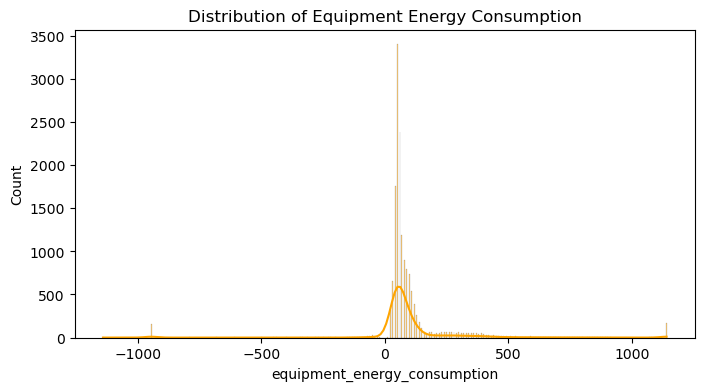

In [99]:
# Plot target distribution

plt.figure(figsize=(8, 4))
sns.histplot(df['equipment_energy_consumption'], kde=True, color='orange')
plt.title("Distribution of Equipment Energy Consumption")
plt.show()

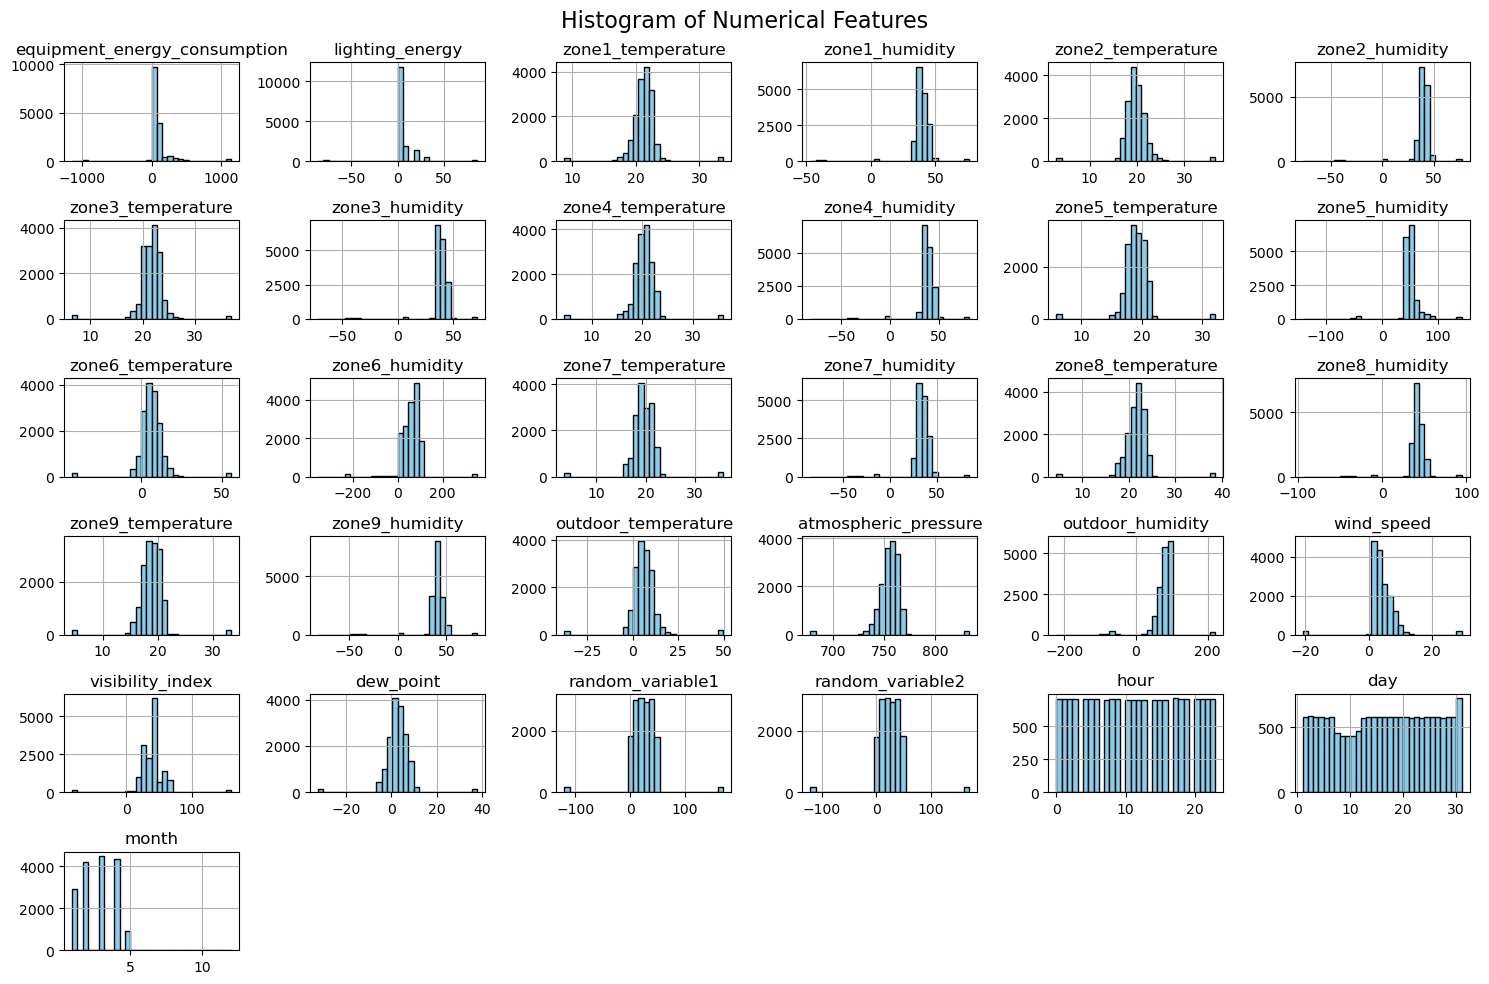

In [100]:
# Univariate Analysis (Distributions)

# Plot distributions for all numerical features

df.hist(bins=30, figsize=(15,10) , color = 'skyblue',edgecolor = 'black')
plt.suptitle("Histogram of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

# Initial Observations Summary

1. Dataset Shape:
    * Rows: 16857
    * Columns: 29

2. Missing Values
    * Many columns have missing values (around 800+ in each) except timestamp column.
    * We'll need a data imputation strategy.

3. Data Types
    * Some numeric-like columns (like equipment_energy_consumption) are wrongly read as object. This will need conversion.

4. Outliers & Anomalies
    * Negative and extreme values (e.g., temperature: -353, humidity: -221, etc.)
    * Need handle outlies 



# Data Preprocessing

In [101]:
# Handle missing values (if any)
df.fillna(df.median(), inplace=True)

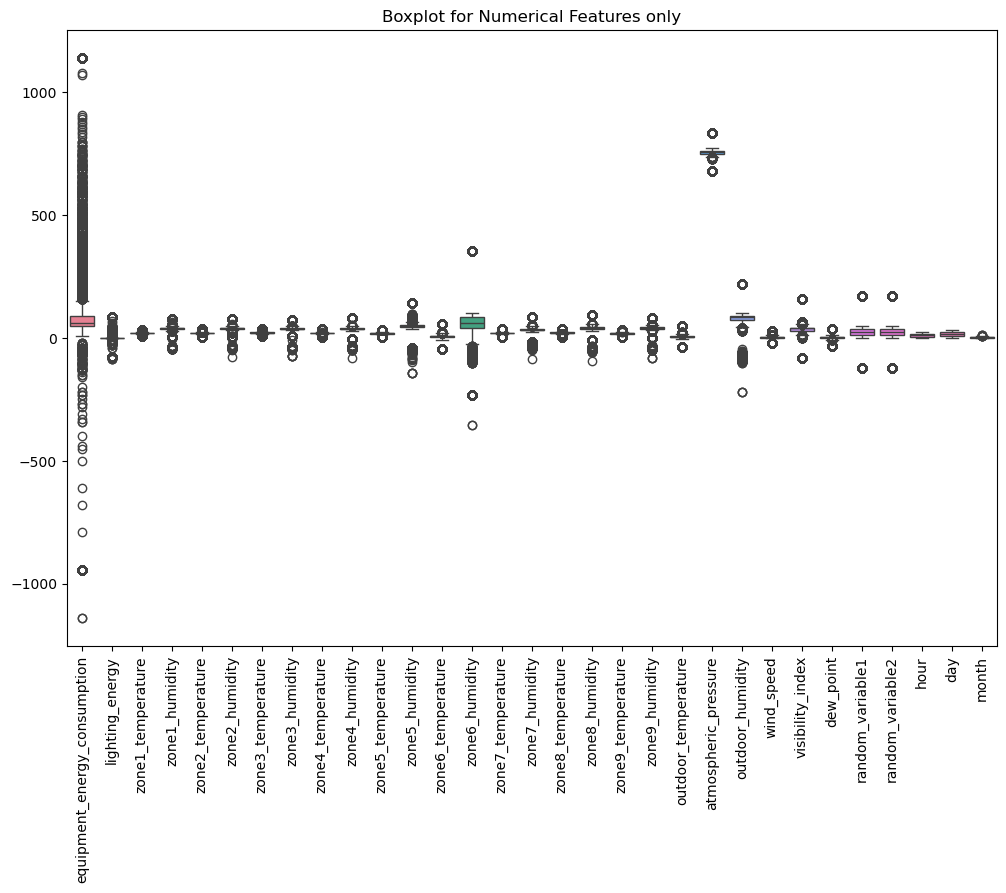

In [102]:
# Check for Extreme Outliers

plt.figure(figsize = (12,8))
sns.boxplot(data = df.select_dtypes(include='number'))
plt.xticks(rotation = 90)
plt.title('Boxplot for Numerical Features only')
plt.show()

# Insights from Current Boxplot
Observations:

1. equipment_energy_consumption shows many extreme outliers, possibly over ±1000.

2. lighting_energy also seems to have a wide range and some outliers.

3. Some zone temperatures/humidities have visible negative outliers — which is not physically meaningful (e.g., humidity < 0).

# Columns with Outliers (based on visual inspection):

    1. equipment_energy_consumption – Severe outliers beyond ±1000
    2. lighting_energy – Outliers in both low and high ends
    3.zone1_temperature to zone9_temperature – Mild outliers
    4.zone1_humidity to zone9_humidity – Some columns have negative outliers (not valid)
    5.outdoor_temperature – Some negative outliers
    6.outdoor_humidity – Slight outliers, possibly negatives
    7.wind_speed – Some sharp outliers
    8.atmospheric_pressure – Few outliers
    9.random_variable1, random_variable2 – Slight outliers

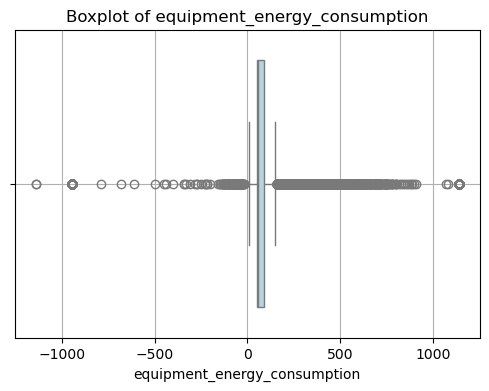

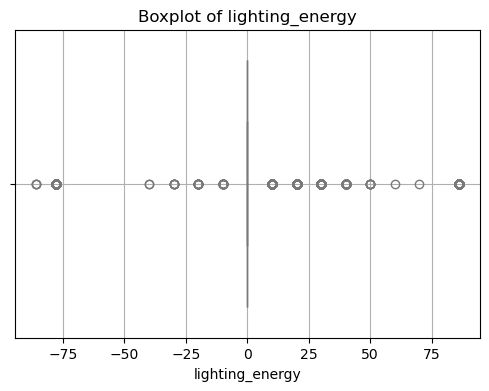

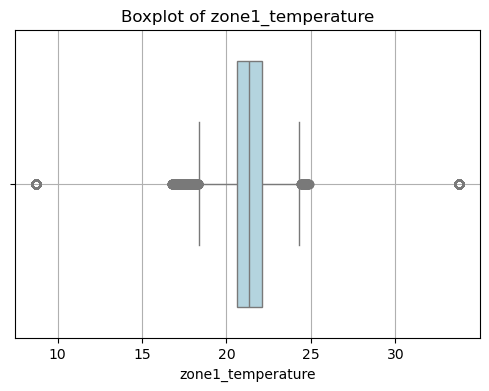

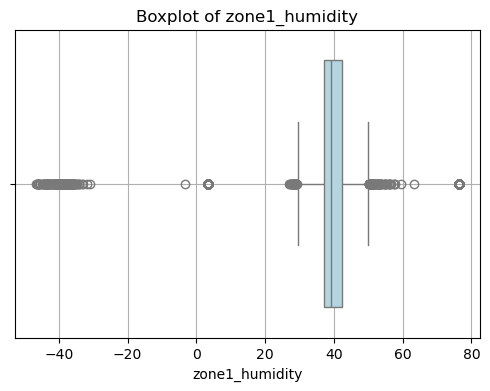

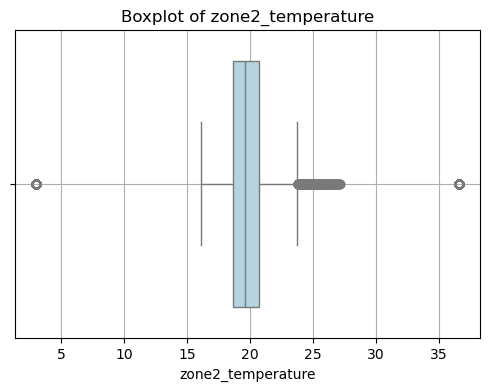

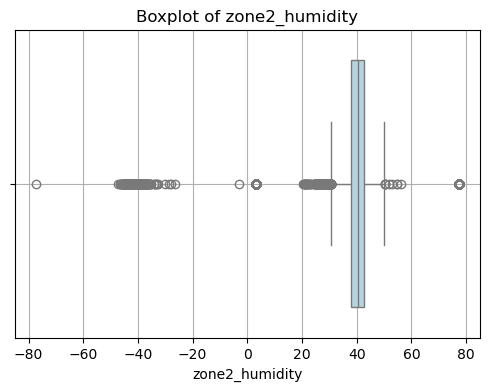

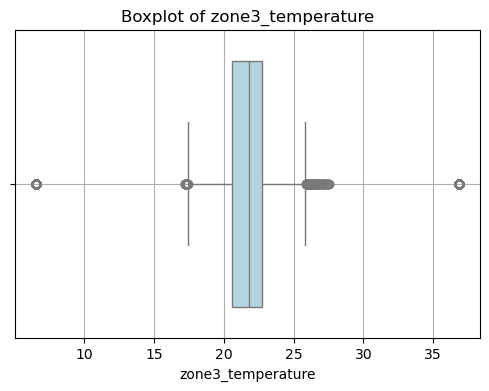

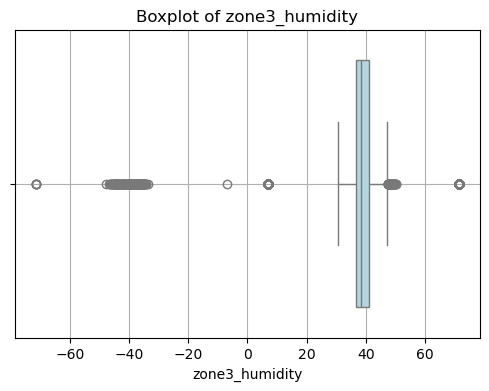

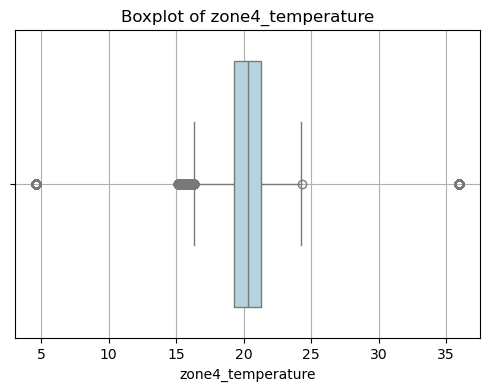

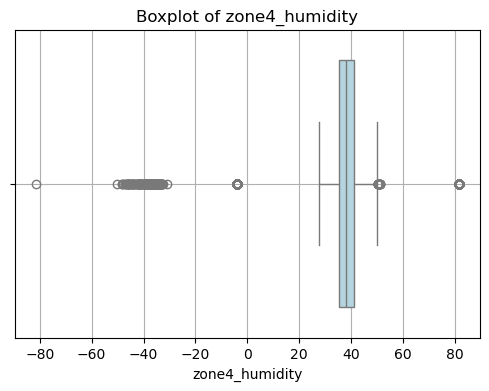

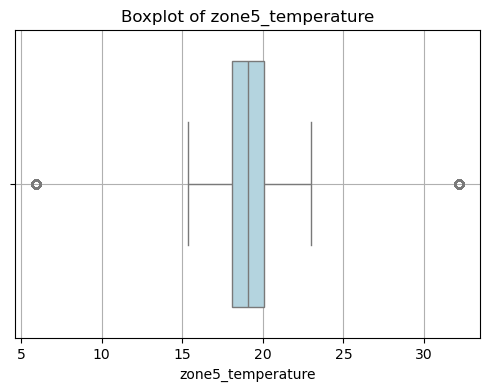

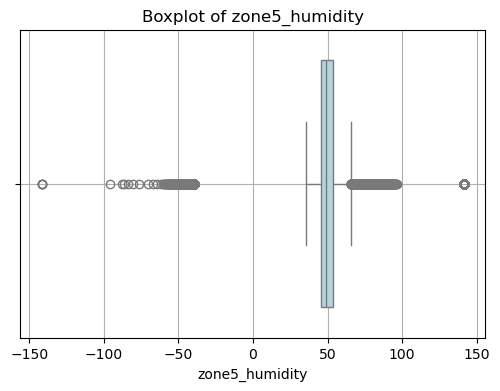

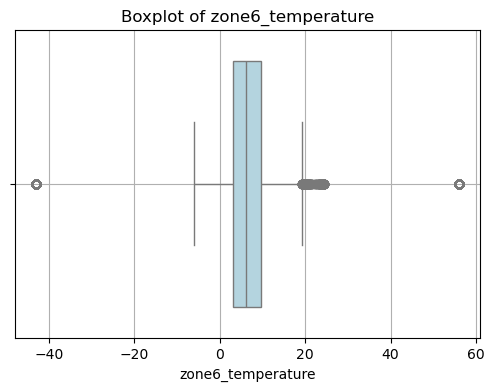

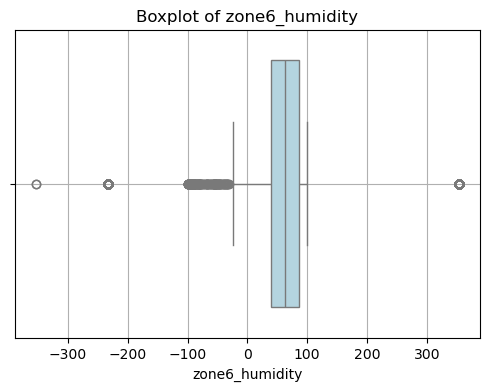

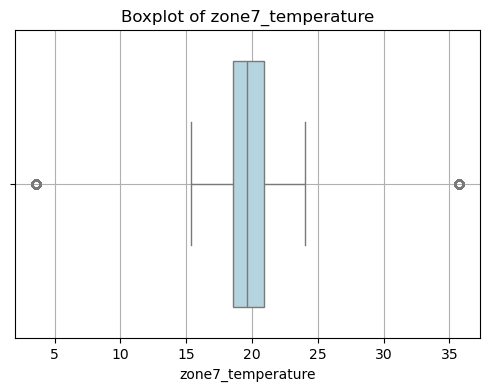

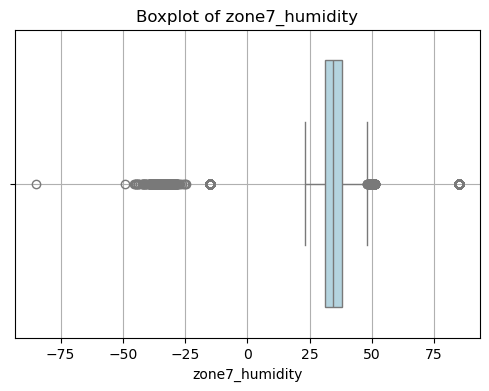

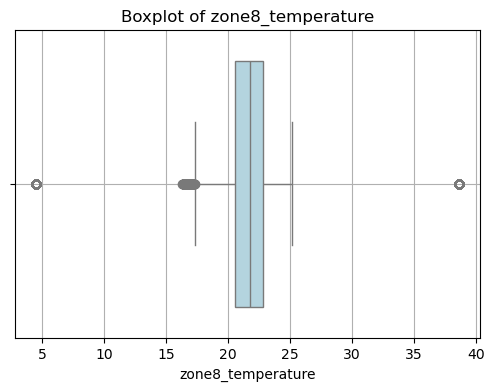

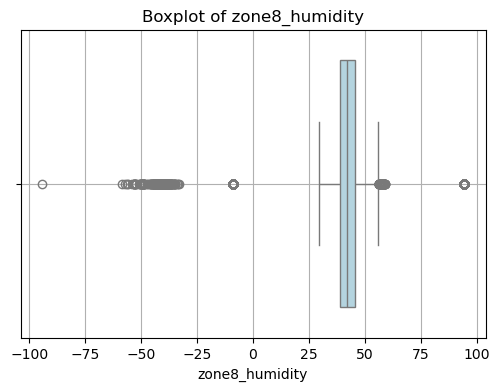

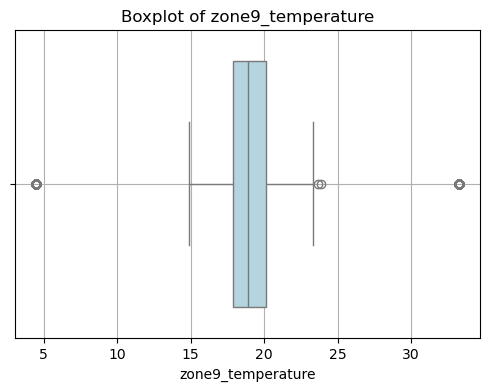

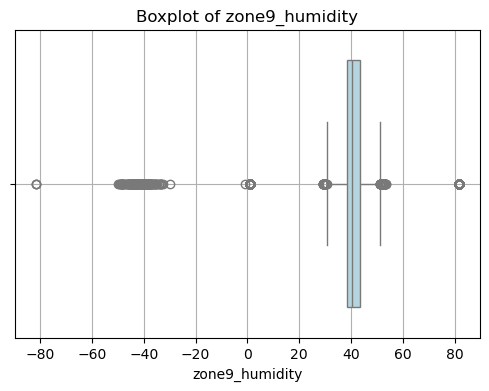

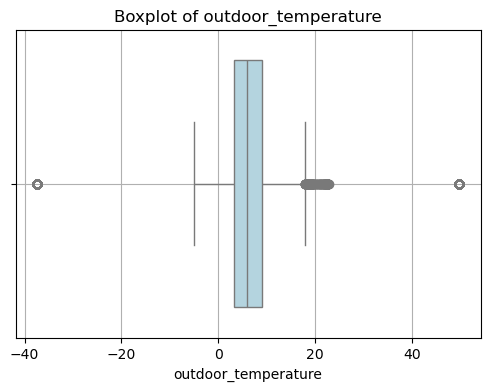

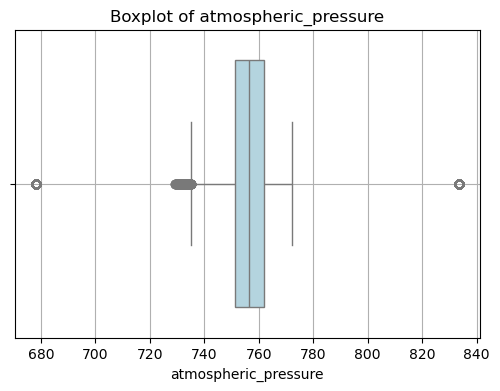

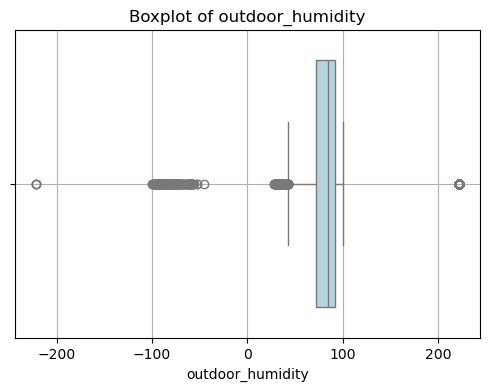

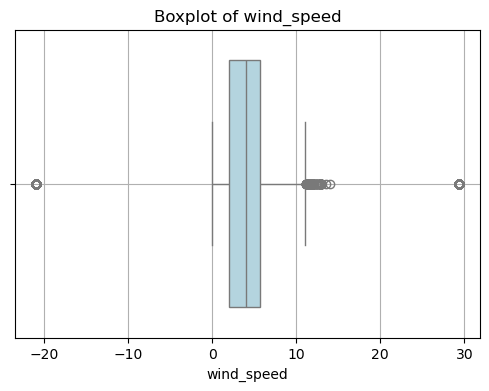

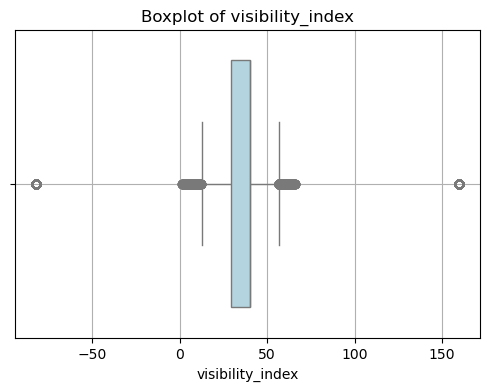

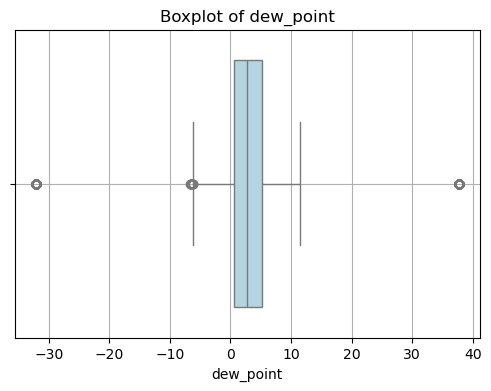

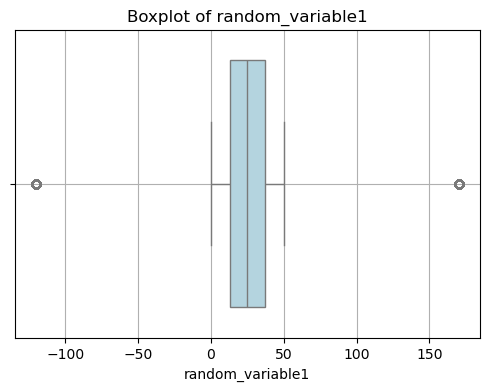

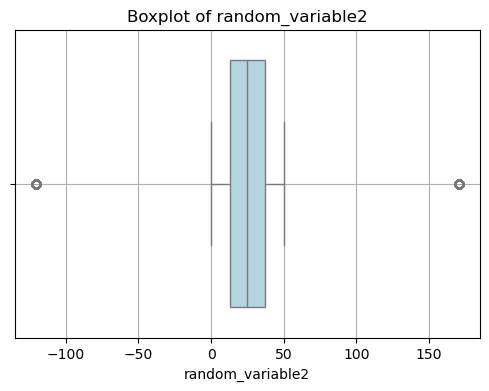

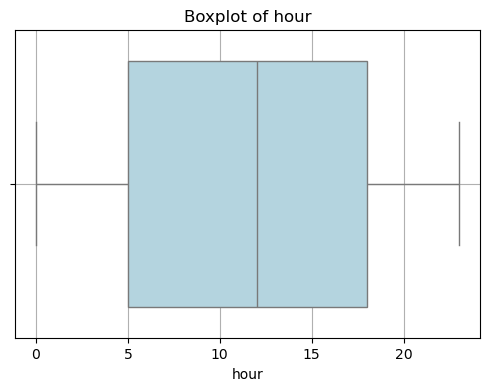

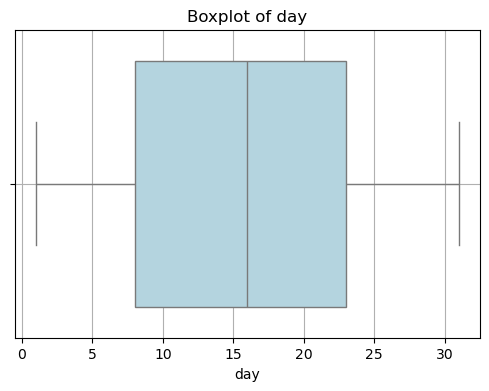

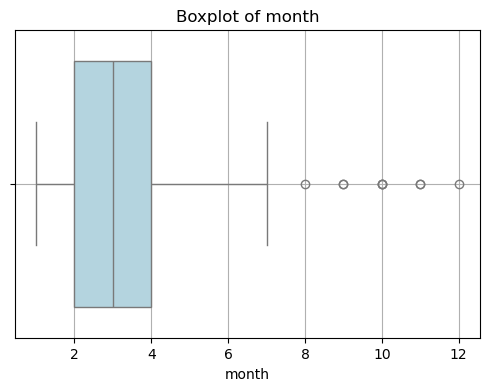

In [103]:
# lets'visulaize each column seperately

numerical_cols = df.select_dtypes(include='number')


for col in numerical_cols:
    plt.figure(figsize = (6,4))
    sns.boxplot(x= df[col], color = 'lightblue')
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

In [104]:
# Outlier Treatment Plan (Using IQR method)

def treat_outliers_iqr(df, cols):
    df_out = df.copy()
    for col in cols:
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_fence = Q1 - 1.5*IQR
        upper_fence = Q3 + 1.5*IQR

        # cap the outliers

        df_out[col] = df_out[col].apply(lambda x: lower_fence if x < lower_fence else upper_fence if x > upper_fence else x)

    return df_out

In [105]:
cols_with_outliers = [
    'equipment_energy_consumption', 'lighting_energy',
    'zone1_temperature', 'zone2_temperature', 'zone3_temperature', 'zone4_temperature',
    'zone5_temperature', 'zone6_temperature', 'zone7_temperature', 'zone8_temperature', 'zone9_temperature',
    'zone1_humidity', 'zone2_humidity', 'zone3_humidity', 'zone4_humidity', 'zone5_humidity',
    'zone6_humidity', 'zone7_humidity', 'zone8_humidity', 'zone9_humidity',
    'outdoor_temperature', 'outdoor_humidity',
    'wind_speed', 'atmospheric_pressure',
    'random_variable1', 'random_variable2'
]

# Apply IQR-based outlier treatment
df_cleaned = treat_outliers_iqr(df, cols_with_outliers)
print(df_cleaned.shape)

(16857, 31)


In [106]:
# Treat Negative Humidity Specifically

# Set negative humidity values to 0 (invalid in real life)
humidity_cols = [col for col in df_cleaned.columns if 'humidity' in col]
for col in humidity_cols:
    df_cleaned[col] = df_cleaned[col].apply(lambda x: max(x, 0))


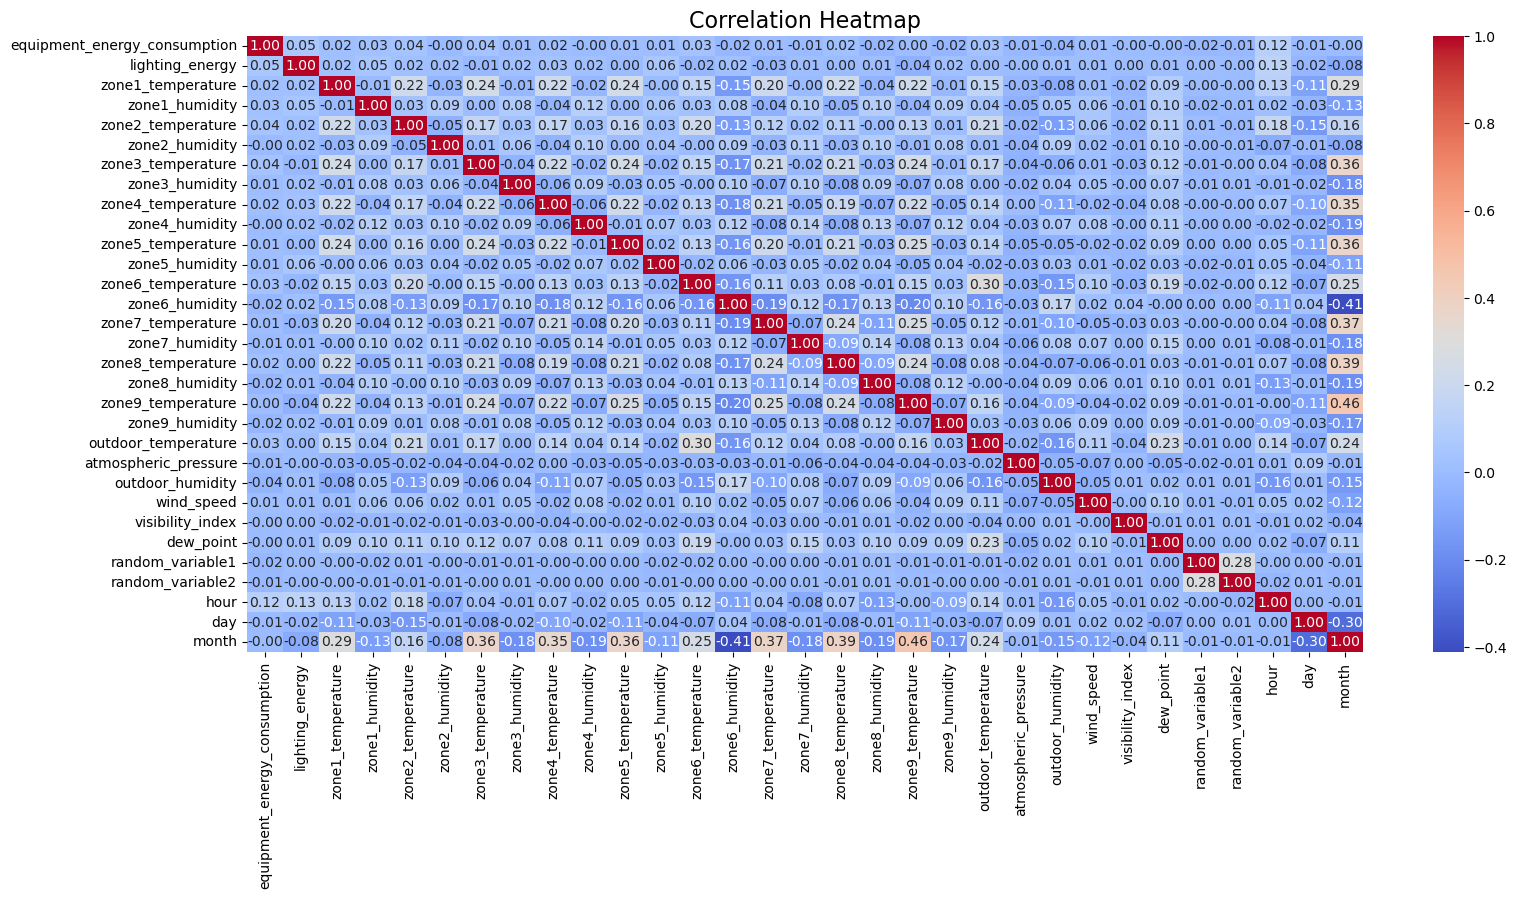

In [107]:
# Correlation heatmap
plt.figure(figsize = (18,8))
sns.heatmap(df.corr(), annot = True, fmt=".2f",cmap = 'coolwarm')
plt.title("Correlation Heatmap" ,fontsize = 16)
plt.show()


In [108]:
# lets drop below all columns

drop_features = [
    'atmospheric_pressure', 'visibility_index', 'dew_point',
    'random_variable2', 'day',
]
df.drop(columns=drop_features, inplace=True)

In [109]:
df.head()

,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,...,zone8_temperature,zone8_humidity,zone9_temperature,zone9_humidity,outdoor_temperature,outdoor_humidity,wind_speed,random_variable1,hour,month
0,60.0,-77.787786,33.746609,47.596667,19.2,44.790000,19.79,38.400000,19.000000,45.566667,...,18.2,48.900000,17.033333,45.53,6.600000,92.0,7.000000,13.275433,17,1
1,60.0,30.000000,19.890000,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,18.2,48.863333,17.066667,45.56,6.483333,92.0,6.666667,18.606195,17,1
2,50.0,30.000000,19.890000,46.300000,19.2,44.626667,19.79,44.933333,35.921144,45.890000,...,18.2,48.730000,17.000000,45.50,6.366667,92.0,6.333333,28.642668,17,1
3,50.0,40.000000,33.746609,46.066667,19.2,44.590000,19.79,45.000000,20.290000,45.723333,...,18.1,94.385668,17.000000,45.40,6.250000,92.0,6.000000,45.410389,17,1
4,60.0,40.000000,19.890000,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,18.1,48.590000,4.476511,45.40,6.133333,92.0,5.666667,10.084097,17,1


#  Feature Engineering & Selection

In [110]:
X = df.drop(columns=['equipment_energy_consumption'],axis = 1)
y = df['equipment_energy_consumption']

In [111]:
# Train-Test Split

X_train , X_test , y_train, y_test = train_test_split(X, y , test_size=0.2 , random_state=42)
X_train.shape

(13485, 25)

In [112]:
# Optional: Scaling  can remove if results are not good, no impact

'''scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)'''

'scaler = StandardScaler()\nX_train_s = scaler.fit_transform(X_train)\nX_test_s = scaler.transform(X_test)'

# Model development and training

In [113]:
# 1. Linear Regression

lr = LinearRegression()
lr.fit(X_train , y_train)
lr_preds = lr.predict(X_test)


# 2. Random Forest Regressor

rf = RandomForestRegressor()
rf.fit(X_train , y_train)
rf_preds = rf.predict(X_test)

# 3. XGBoost

xgb = XGBRegressor()
xgb.fit(X_train , y_train)
xgb_preds = xgb.predict(X_test)  

In [114]:
# Model evaluation and testing

def evaluate_model(y_true , y_pred , model_name):
    print(f"\n {model_name} Evaluation")
    print("RMSE:" ,root_mean_squared_error(y_true , y_pred))
    print("MAE :",mean_absolute_error(y_true , y_pred))
    print("r2_score:",r2_score(y_true , y_pred))



In [115]:
evaluate_model(y_test, lr_preds, "Linear Regression")
evaluate_model(y_test, rf_preds, "Random Forest")
evaluate_model(y_test, xgb_preds, "XGBoost")



 Linear Regression Evaluation
RMSE: 177.99851263734493
MAE : 74.2509588077697
r2_score: 0.01812924354031309

 Random Forest Evaluation
RMSE: 173.7260874296771
MAE : 71.67007368545671
r2_score: 0.06469844510886191

 XGBoost Evaluation
RMSE: 180.0449172619412
MAE : 81.45688750227988
r2_score: -0.00457718322590428


## Above results are not good enough

### so lets do Hyperparameter Tuning and Model Training - XGBoost   

In [116]:
#Hyperparamter tunning for Random forest regressor

rf_params = {
    'n_estimators' :[50,100],
    'max_depth' : [2,4,None],
    'min_samples_split' :[2,5]
}

rf = RandomForestRegressor(random_state=42)
grid_rf = GridSearchCV(rf, rf_params ,cv = 3, n_jobs = -1,scoring = 'r2')
grid_rf.fit(X_train , y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 4, None], 'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='r2')

In [117]:
best_rf =grid_rf.best_estimator_
rf_preds = best_rf.predict(X_test)

In [118]:
# Final Evaluation
evaluate_model(y_test, rf_preds , "Random Forest (Tuned)")


 Random Forest (Tuned) Evaluation
RMSE: 175.8779843998704
MAE : 70.28796391293515
r2_score: 0.041384297863545805


# Insight Summary:

None of the models achieved high R², indicating that the dataset may lack strong predictors for the target variable.

Minor performance differences between models suggest feature engineering and data enrichment could be more impactful than further tuning.

Recommendation: Focus on:

Handling multicollinearity

Adding domain-relevant features

Dimensionality reduction or PCA

Possibly removing low-variance or noisy features

## After Hyperparameter Tuning (Random Forest):

Tuned Random Forest showed a slight decline compared to the untuned version:

RMSE: 174.21

MAE: 72.30

R² Score: 0.059
Indicates hyperparameter tuning did not lead to significant gains. This could be due to:

Limited useful features or noise in the data

Strong multicollinearity or irrelevant variables